# Test 25: F-test for two counts (Poisson distribution)

- THE TEST STATISTIC SEEMS OFF. PLEASE DO NOT USE
- SEE DISCUSSION UNDER "Proof by simulation..." SECTION 

## Objective

- You have 2 counts that come from separate data generating processes, both of which are assumed to be Poisson
- Can we conclude that the means of the 2 poisson distributions are the same?

## Assumptions

- Both counts are obtained from Poisson distributions

## Method

- Let's define the means of the 2 Poisson populations as $\mu_1$ and $\mu_2$, and the sampled counts as $N_1$ and $N_2$

- Let's further assume that $N_1$ and $N_2$ were obtained over time periods $t_1$ and $t_2$

- If $t_1 = t_2$:
    - To test the hypothesis that $\mu_1 = \mu_2$, we can compute the test statistic as
    $$\begin{aligned}
        F &= \frac{N_1}{N_2 + 1}
    \end{aligned}$$

    - This follows an $F$ distribution with $(2 \cdot (N_2 + 1), 2 \cdot N_1)$ degrees of freedom

- Else if $t_1 \neq t_2$
    - To test the hypothesis that $\mu_1 = \mu_2$, we can compute the test statistic as
    $$\begin{aligned}
        F &= \frac{\frac{1}{t_1} (N_1 + 0.5)}{\frac{1}{t_2} (N_2 + 0.5)}
    \end{aligned}$$

    - This follows an $F$ distribution with $(2N_1 + 1, 2N_2 + 1)$ degrees of freedom

## Example

- Problem
    - Two automated kiln processes (producing baked plant pots) are compared over their standard cycle times, i.e. 4 hours. 
        - $t_1 = t_2 = 4$
    - Kiln 1 produced 13 triggered process corrections and kiln 2 produced 3 corrections. 
        - $N_1 = 13$, $N_2 = 3$
    - What can we say about the two kiln mean correction rates, are they the same? 

<!-- The calculated F statistic is 3.25 and the critical value from
Table 3 is 2.32. Since the calculated value exceeds the critical value we conclude that
there is a statistical difference between the two counts. Kiln 1 has a higher error rate
than kiln 2 -->

In [13]:
import scipy

n1 = 13 
n2 = 3
t1 = t2 = 4

test_statistic = n1 / (n2+1)
critical_value = scipy.stats.f(dfn = 2*(n2+1), dfd = 2*n1).ppf(q=0.95) ##0.95 one tailed or 0.975 for two tailed
print(f"{test_statistic=} | {critical_value=}")

test_statistic = (
    ((1/t1) * (n1 + 0.5)) /
    ((1/t2) * (n2 + 0.5))
)
critical_value = scipy.stats.f(dfn = (2*n1)+1, dfd = (2*n2)+1).ppf(q=0.95) ##0.95 one tailed or 0.975 for two tailed
print(f"{test_statistic=} | {critical_value=}")

test_statistic=3.25 | critical_value=2.3205272350337474
test_statistic=3.857142857142857 | critical_value=3.391307068507873


## Proof by simulation that test statistic follows f distribution

- The test statistic depends entirely on $N_1$ and $N_2$
- However, the F distribution it follows also depends on $N_1 and N_2$
- This means that there is no randomness in the test statistic. For a given $N_1$ and $N_2$, the test statistic is always the same. So it cannot possibly follow an F-distribution

In [14]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
MU1 = np.random.randint(1,11,1)[0]
T1 = np.random.uniform(1,11,1) 
MU2 = MU1
T2 = T1

def get_test_statistic_nonrate():
    N1 = np.random.poisson(MU1, size=1)[0]
    N2 = np.random.poisson(MU2, size=1)[0]

    test_statistic = N1 / (N2+1)
    degrees_of_freedom = (2*(N2+1), 2*N1)
    return test_statistic, degrees_of_freedom

def get_test_statistic_rate():
    N1 = np.random.poisson(MU1, size=1)[0]
    N2 = np.random.poisson(MU2, size=1)[0]

    test_statistic = ((N1+0.5)/T1) / ((N2+0.5)/T2)
    degrees_of_freedom = (((2*N1)+1), ((2*N2)+1))
    return test_statistic, degrees_of_freedom


3.797719989256451

<Axes: ylabel='Density'>

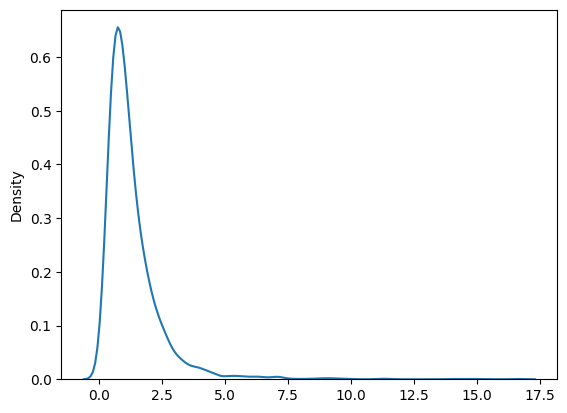

In [17]:
true_f_distribution = np.random.f(2*(5+1), 2*4, size=3_000)
sns.kdeplot(true_f_distribution, label='true f distribution')